In [12]:
import pandas as pd
import numpy as np
from PIL import Image
import os

In [13]:
# get the subfolders in root folder 
root_folder = r"Resources"
sub_folder_names = os.listdir(root_folder)
sub_folder_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [14]:
#empty list for dataframes
df_list = []

# make dataframes for each subfolder and label each image
for sub_folder_name in sub_folder_names:
    subfolder_path = os.path.join(root_folder, sub_folder_name)
    if not os.path.isdir(subfolder_path):
        continue  # Skip if it's not a directory // such as .DS_Store
    else:
        file_names = os.listdir(subfolder_path)
        df = pd.DataFrame(file_names, columns=['image_id'])
        df['label'] = sub_folder_name
        df_list.append(df)

# concat list of dataframes into one dataframe
concat_df = pd.concat(df_list)
concat_df

,image_id,label
0,0.jpg,buildings
1,10006.jpg,buildings
2,1001.jpg,buildings
3,10014.jpg,buildings
4,10018.jpg,buildings
...,...,...
2878,9961.jpg,street
2879,9967.jpg,street
2880,9978.jpg,street
2881,9989.jpg,street


In [15]:
#check if there are null values
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17034 entries, 0 to 2882
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  17034 non-null  object
 1   label     17034 non-null  object
dtypes: object(2)
memory usage: 399.2+ KB


In [16]:
# check that all image ids are unique
len(concat_df['image_id'].unique())

17034

In [17]:
# value counts for labels
concat_df['label'].value_counts()

label
mountain     3037
glacier      2957
street       2883
sea          2784
forest       2745
buildings    2628
Name: count, dtype: int64

<Axes: ylabel='label'>

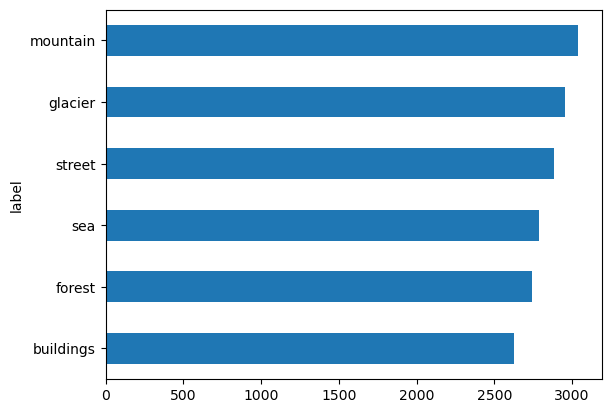

In [18]:
# graph value counts
concat_df['label'].value_counts().sort_values().plot.barh()

In [30]:
# create empty list to store images
imgs = []
# create empty list to image formats
imgs_format = []

# iterate through each row and get file path for each img
# open image and append it to empty list
for row in concat_df.itertuples():
    file_path = os.path.join(root_folder, row.label, row.image_id)
    with Image.open(file_path) as img:
        imgs_format.append(img.format)
        imgs.append(img.copy())
    


In [32]:
# make sure all images in same file format
set(imgs_format)

{'JPEG'}

In [20]:
# Check for unique image sizes
sizes = set([img.size for img in imgs])
sizes

{(150, 72),
 (150, 76),
 (150, 81),
 (150, 97),
 (150, 100),
 (150, 102),
 (150, 103),
 (150, 105),
 (150, 108),
 (150, 110),
 (150, 111),
 (150, 113),
 (150, 115),
 (150, 119),
 (150, 120),
 (150, 123),
 (150, 124),
 (150, 131),
 (150, 133),
 (150, 134),
 (150, 135),
 (150, 136),
 (150, 140),
 (150, 141),
 (150, 142),
 (150, 143),
 (150, 144),
 (150, 145),
 (150, 146),
 (150, 147),
 (150, 149),
 (150, 150)}

In [21]:
# create an empty dictionary to store img size counts
img_size_count = {}

# get counts for each image size
for img in imgs:
    if str(img.size) in img_size_count:
        img_size_count[str(img.size)] += 1
    else:
        img_size_count[str(img.size)] = 1

# print to determine which image size is most abundant in dataset
img_size_count

{'(150, 150)': 16979,
 '(150, 124)': 1,
 '(150, 113)': 7,
 '(150, 108)': 2,
 '(150, 133)': 1,
 '(150, 115)': 1,
 '(150, 135)': 3,
 '(150, 141)': 2,
 '(150, 136)': 2,
 '(150, 110)': 2,
 '(150, 105)': 1,
 '(150, 111)': 3,
 '(150, 120)': 1,
 '(150, 149)': 2,
 '(150, 143)': 2,
 '(150, 146)': 2,
 '(150, 134)': 2,
 '(150, 142)': 2,
 '(150, 123)': 2,
 '(150, 119)': 1,
 '(150, 102)': 1,
 '(150, 76)': 2,
 '(150, 72)': 1,
 '(150, 97)': 1,
 '(150, 144)': 2,
 '(150, 103)': 1,
 '(150, 131)': 2,
 '(150, 81)': 2,
 '(150, 100)': 1,
 '(150, 145)': 1,
 '(150, 147)': 1,
 '(150, 140)': 1}

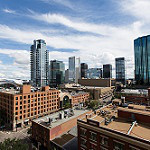

In [22]:
# use target size that is most abundant in dataset 
target_size = (150, 150)

# resize images
resized_imgs = [img.resize(target_size, resample = Image.LANCZOS) for img in imgs]
resized_imgs[1]

In [23]:
# check if resizing images was succesful by checking unique values again
sizes = set([img.size for img in resized_imgs])
sizes

{(150, 150)}

In [24]:
# make sure all images are in RGB format
set([img.mode for img in resized_imgs])

{'RGB'}

In [26]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_imgs]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[[247. 247. 245.]
  [247. 247. 245.]
  [248. 248. 246.]
  ...
  [248. 248. 248.]
  [247. 247. 245.]
  [247. 247. 245.]]

 [[246. 246. 244.]
  [247. 247. 245.]
  [247. 247. 245.]
  ...
  [248. 248. 248.]
  [247. 247. 245.]
  [247. 247. 245.]]

 [[246. 246. 244.]
  [246. 246. 244.]
  [247. 247. 245.]
  ...
  [248. 248. 248.]
  [247. 247. 245.]
  [247. 247. 245.]]

 ...

 [[ 47.  46.  44.]
  [ 62.  61.  59.]
  [ 49.  48.  46.]
  ...
  [ 51.  46.  43.]
  [ 45.  40.  37.]
  [ 94.  89.  86.]]

 [[ 77.  76.  74.]
  [ 47.  46.  44.]
  [ 43.  42.  40.]
  ...
  [ 22.  17.  14.]
  [ 55.  50.  47.]
  [ 39.  34.  31.]]

 [[ 59.  58.  56.]
  [ 55.  54.  52.]
  [ 60.  59.  57.]
  ...
  [ 31.  26.  23.]
  [ 51.  46.  43.]
  [ 63.  58.  55.]]]


In [27]:
# Normalize pixel values to a range between 0 and 1,
# divide all pixel values by the max of 255
normalized_images = [img/255 for img in float_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(normalized_images[0])

Pixel Values:
[[[0.96862745 0.96862745 0.9607843 ]
  [0.96862745 0.96862745 0.9607843 ]
  [0.972549   0.972549   0.9647059 ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.96862745 0.96862745 0.9607843 ]
  [0.96862745 0.96862745 0.9607843 ]]

 [[0.9647059  0.9647059  0.95686275]
  [0.96862745 0.96862745 0.9607843 ]
  [0.96862745 0.96862745 0.9607843 ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.96862745 0.96862745 0.9607843 ]
  [0.96862745 0.96862745 0.9607843 ]]

 [[0.9647059  0.9647059  0.95686275]
  [0.9647059  0.9647059  0.95686275]
  [0.96862745 0.96862745 0.9607843 ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.96862745 0.96862745 0.9607843 ]
  [0.96862745 0.96862745 0.9607843 ]]

 ...

 [[0.18431373 0.18039216 0.17254902]
  [0.24313726 0.23921569 0.23137255]
  [0.19215687 0.1882353  0.18039216]
  ...
  [0.2        0.18039216 0.16862746]
  [0.1764706  0.15686275 0.14509805]
  [0.36862746 0.34901962 0.3372549 ]]

 [[0.3019608  0.29803923 0.2901961 ]
  [0.18431373 0.1803921

In [28]:
# Add batch dimension
reshaped_image_array = np.expand_dims(normalized_images, axis=0)

In [29]:
reshaped_image_array.shape

(1, 17034, 150, 150, 3)